In [201]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PL
import skimage.feature as F
import math as M

(-0.5, 682.5, 511.5, -0.5)

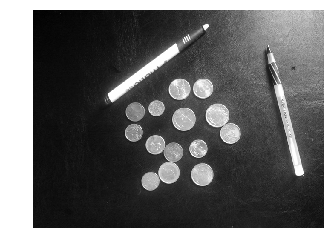

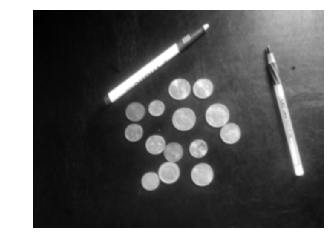

In [202]:
X_1 = CV.imread('image2 (1).jpg')
X_copy = X_1
X_2= CV.cvtColor(X_1,CV.COLOR_BGR2GRAY)
PL.figure(1)
PL.imshow(X_2,'gray')
PL.axis('off')
I_BLUR = CV.GaussianBlur(X_2,(9,9),0)
PL.figure(2)
PL.imshow(I_BLUR,'gray')
PL.axis('off')

In [203]:
X = F.canny(I_BLUR,1,(0.2*NP.min(X_2)),(0.5*NP.max(X_2)))

(-0.5, 682.5, 511.5, -0.5)

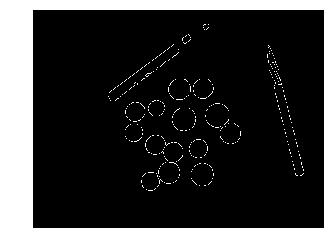

In [204]:
X.dtype = 'uint8'
PL.figure(3)
PL.imshow(X,'gray')
PL.axis('off')

In [209]:
if X.shape[0]==X.shape[1]:
    count = int(NP.round(NP.sqrt(2) * X.shape[0]))
else:
    count = int(NP.round(NP.sqrt(X.shape[0]**2 + X.shape[1]**2)))


In [211]:
H_SPACE = NP.zeros(((2*count+1),181))
H_SPACE.shape
H_SPACE_2 = NP.zeros((X.shape[0],X.shape[1],21))

(512, 683, 21)

In [212]:
for y in range(0,X.shape[0]):
    for x in range(0,X.shape[1]):
        if X[y,x] == 1:
            for a in range(-90,91):
                theta = (M.pi/180) *a
                S=(int(NP.round((x*M.cos(theta) + y*M.sin(theta)))))
                H_SPACE[S+854,a+90] = H_SPACE[S+854,a+90] + 1

(-0.5, 180.5, 1708.5, -0.5)

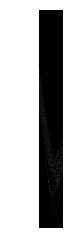

In [213]:
PL.figure(4)
PL.imshow(H_SPACE,'gray')
PL.axis('off')

In [197]:
I = H_SPACE
L = list(I.ravel())
L.sort(reverse = True)

In [214]:
for i in range(0,4):
    R = NP.where(H_SPACE == L[i])
    for j in range(0,len(R[0])):
        theta = int(R[1][j]-90)
        rhow = int(R[0][j]-854)
        if theta <0:
            x1 = int(rhow/M.cos((abs(theta))*M.pi/180))
            theta_2 = 180-(abs(theta) + 90)
            AD = int(512/M.tan((theta_2)*M.pi/180))
            x2 = x1 + AD
            Y=CV.line(X_1,(x1,0),(x2,512),(0,0,100),5)
        else:
            x1 = int(rhow/M.cos((theta)*M.pi/180))
            y1 = int(rhow/M.sin((theta)*M.pi/180))
            Y=CV.line(X_1,(x1,0),(0,y1),(0,0,100),5)

(-0.5, 682.5, 511.5, -0.5)

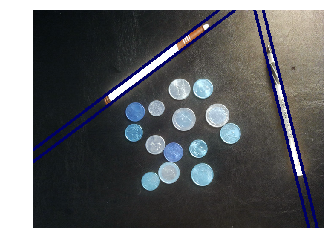

In [215]:
PL.figure(5)
PL.imshow(Y)
PL.axis('off')

In [216]:

for y in range(150,480):
    for x in range(150,520):
        if X[y,x] == 1:
            for R in range(10,31):
                D = R-10
                for A in range(150,520):
                    for B in range(150,480):
                        if ((x-A)**2 + (y-B)**2) == (R**2):
                            H_SPACE_2[B,A,D] = H_SPACE_2[B,A,D] + 1 

In [225]:
I1 = H_SPACE_2
L1 = list(I1.ravel())
L1.sort(reverse = True)

Text(0.5,1,'OUTPUT IMAGE')

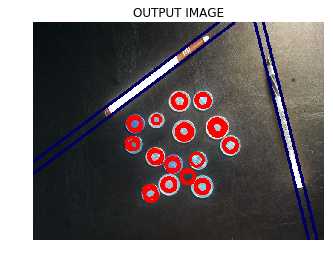

In [228]:
for i in range(0,40):
    R = NP.where(H_SPACE_2 == L1[i])
    for j in range(0,len(R[0])):
        X_cor = R[1][j]
        Y_cor = R[0][j]
        radius = R[2][j]
        S = CV.circle(Y,(X_cor,Y_cor),radius,(255,0,0),1)
PL.figure(6)    
PL.imshow(S)
PL.axis('off')
PL.title('OUTPUT IMAGE')